In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, cowplot, ggdist)

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

In [4]:
# baseraincloud_plot.fx <- function(mydf, yvar, xvar, fillvar, colpal, binw, pointsize) {

#     p0 <- ggplot(data = mydf, aes(x = eval(parse(text = xvar)), y = eval(parse(text = yvar)), fill = eval(parse(text = fillvar)))) +
#         ggdist::stat_dist_halfeye(adjust = 0.5, .width = 0, justification = -0.1, point_color = NA, width = 0.7) +
#         geom_boxplot(width = 0.1, outlier.shape = NA, alpha = 0.5) +
#         ggdist::stat_dots(side = "left", justification = 1.1, binwidth = binw, dotsize = pointsize) +
#         scale_fill_manual(values = colpal) +
#         myaxis +
#         myplot +
#         theme(legend.position = "none") + scale_y_continuous(limits = c(0, 110), breaks = c(0, 25, 50, 75, 100)) +
#         labs(x = "", y = gsub("`", "", yvar) ) 
#     return(p0)
# }


In [5]:
baseraincloud_plot.fx <- function(mydf, yvar, xvar, fillvar, colpal, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2, adjustslab= 0.5, binwidth. = unit(0.01, "npc") ) {
    p0 <- ggplot(data = mydf, aes(x = eval(parse(text = xvar)), y = eval(parse(text = yvar)), fill = eval(parse(text = fillvar))))  +
    geom_dots(side = "left", scale = scaledots, justification = justdots, color = "transparent", overlaps = "nudge", binwidth = binwidth.) +
        stat_slab(scale = scaleslab, adjust = adjustslab, justification = justslab) +
        geom_boxplot(width = 0.2, outlier.shape = NA, alpha = 0.5) +
        scale_fill_manual(values = colpal) +
        myaxis +
        myplot +
        theme(legend.position = "none") + scale_y_continuous(limits = c(0, 110), breaks = c(0, 25, 50, 75, 100)) +
        labs(x = "", y = gsub("`", "", yvar))
    return(p0)
}


# Paths

In [7]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [8]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [9]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [10]:
table(meta_div$Patient[meta_div$Disease_type == "NB"])


CHP_346 CHP_379 CHP_385 CHP_418 
      5       6       9       8 

In [11]:
meta_div <- meta_div[ !is.na(meta_div$CD3), ]

In [12]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]
meta_div <- meta_div[ meta_div$cancergroup != "LFS", ]

Exclude T-ALLs

In [13]:
table(meta_div$cancergroup)


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                370                 136                 273                  44 

In [14]:
meta_div <- meta_div[ meta_div$cancergroup != "T-cell malignancies", ]

In [15]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]

In [16]:
dim(pbmc)

[1] 505  66

In [17]:
pbmc <- pbmc[ pbmc$CD3 > 0,]

## Baseline comparisons

In [18]:
pbmc_01 <- pbmc[pbmc$cycle == "X01",]

In [19]:
# pbmc_01_m <- tidyr::pivot_longer(pbmc_01, all_of(c("Naïve%", "SCM%", "CM%", "EM%", "TE%", 
# "PD1%", "LAG3%", "TIM3%")), names_to = "marker", values_to = "value")

In [20]:
# p0 <- ggplot(data = pbmc_01_m, 
# aes(x = cancergroup, y = value, fill = cancergroup)) +
#     geom_dots(side = "left", scale = 0.5, justification = 1.2, 
#     color = "transparent", overlaps = "nudge", binwidth = 5) +
#     stat_slab(scale = 0.5, adjust = 0.5, 
#     justification = -0.2) +
#     geom_boxplot(width = 0.2, outlier.shape = NA, alpha = 0.5) +
#     scale_fill_manual(values = group_col) +
#     scale_y_continuous(limits = c(0, 110), breaks = c(0, 25, 50, 75, 100)) +
#     facet_wrap(~marker, ncol = 3) + myaxis + myplot + theme(legend.position = "none") 

#     p0


In [21]:
# pdf(paste0(plotpath, "rainclouds.pdf"), width =10, height = 10)
# p0
# dev.off()

Naive

In [22]:
p0 <- baseraincloud_plot.fx(pbmc_01, "`Naïve%`", "cancergroup", "cancergroup", group_col, 0.5,1.2,0.5,-0.2,0.5, NA) 

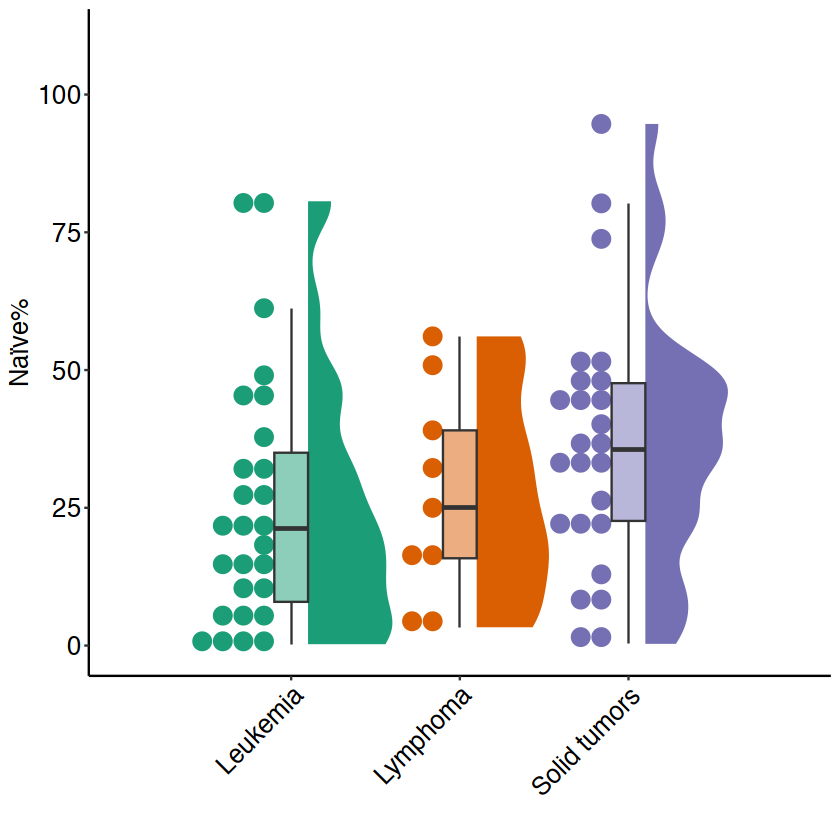

In [23]:
p0

In [24]:
tapply(pbmc_01$`Naïve%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2445  7.9314 21.1640 25.3577 34.9947 80.6271 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.322  15.839  25.000  27.209  39.053  56.111 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3055 22.6195 35.5740 36.8239 47.6151 94.6625 


In [25]:
mytest <- "Naïve%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.05781055

[1] 0.6322416

[1] 0.9666134

In [26]:
mypval <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [27]:
mypval <- round_and_format(mypval)

In [28]:
mypval

[1] "0.06"

In [29]:
p0_stat <- p0 + geom_signif(
    y_position = 100, xmin = 1, xmax = 3,
    annotation = paste0("p = ",mypval), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("Naïve%") ))

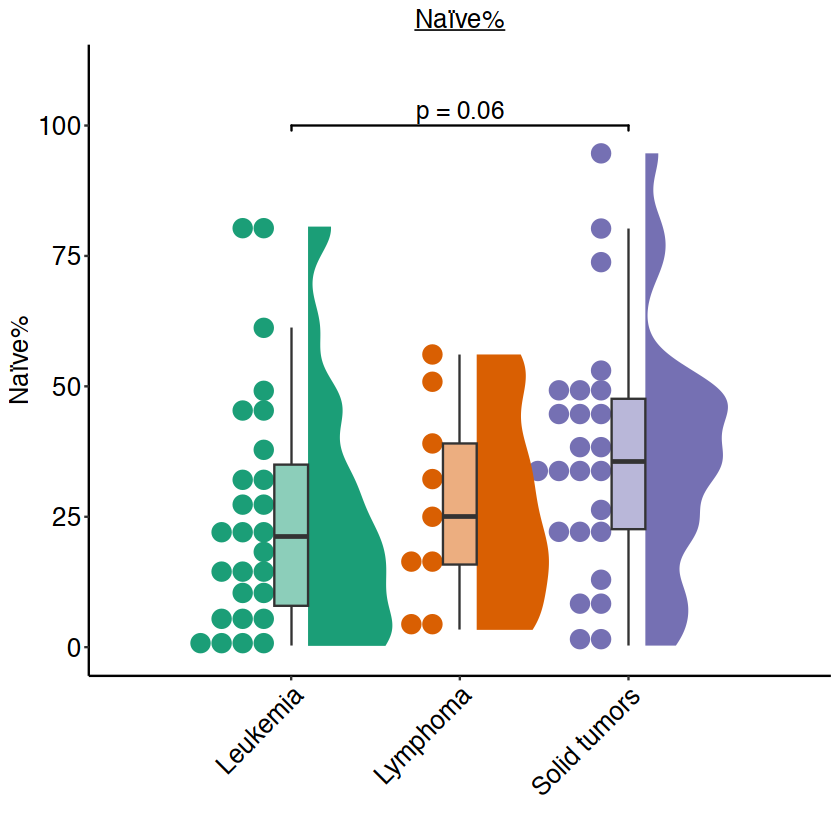

In [30]:
p0_stat

In [31]:
# pdf(paste0(plotpath, "rainclouds_Naive_X01.pdf"), width = 4, height = 6)
# p0_stat
# dev.off()

CM

In [32]:
p1 <- baseraincloud_plot.fx(pbmc_01, "`CM%`", "cancergroup", "cancergroup", group_col, 
scaledots = 0.8, justdots= 1.1, scaleslab= 0.8, justslab= -0.1 , adjustslab= 1, binwidth. = 2 )  

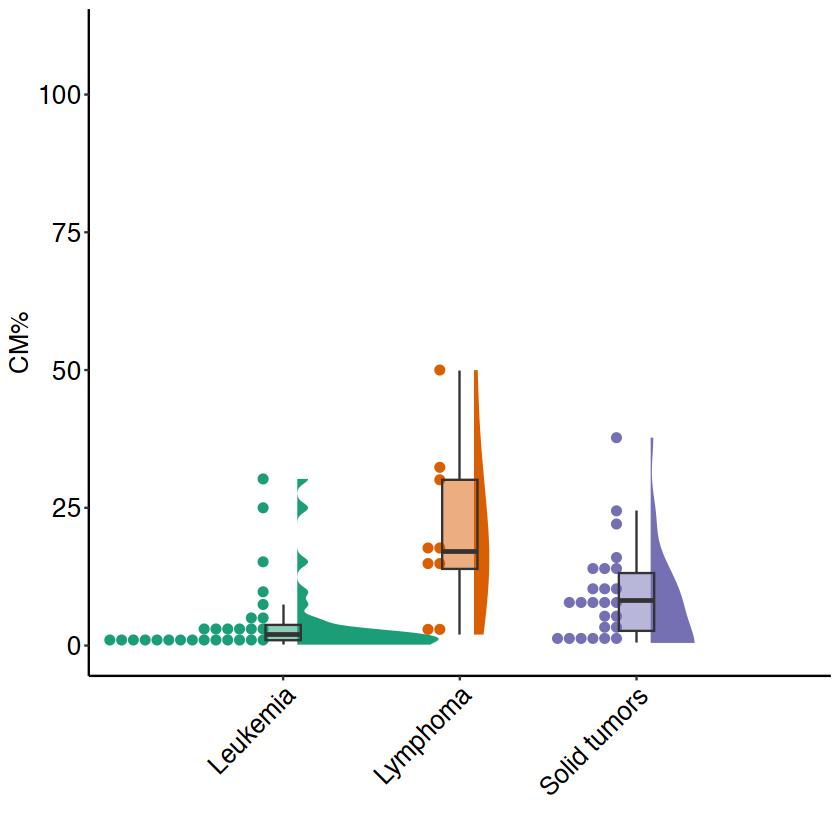

In [33]:
p1

In [34]:
mytest <- "CM%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

[1] 0.002145412

[1] 0.002806573

[1] 0.01374469

In [35]:
mypval1 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
mypval2 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
mypval3 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

In [36]:
mypval1
mypval2
mypval3

[1] 0.002145412

[1] 0.002806573

[1] 0.01374469

In [37]:
tapply(pbmc_01$`CM%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1667  0.9662  2.0157  4.6864  3.7482 30.2376 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.983  13.910  17.084  20.387  30.082  50.000 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4804  2.6672  8.1863  9.3959 13.1579 37.7260 


In [38]:
mypval1 <- round_and_format(mypval1)
mypval2 <- round_and_format(mypval2)
mypval3 <- round_and_format(mypval3)

In [39]:
p1_stat <- p1 + geom_signif(
    y_position = c(75, 100, 85), xmin = c(1,1,2), xmax = c(2,3,3),
    annotation = c(paste0("p = ",mypval2), paste0("p = ",mypval1), paste0("p = ", mypval3)), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("CM%") ))

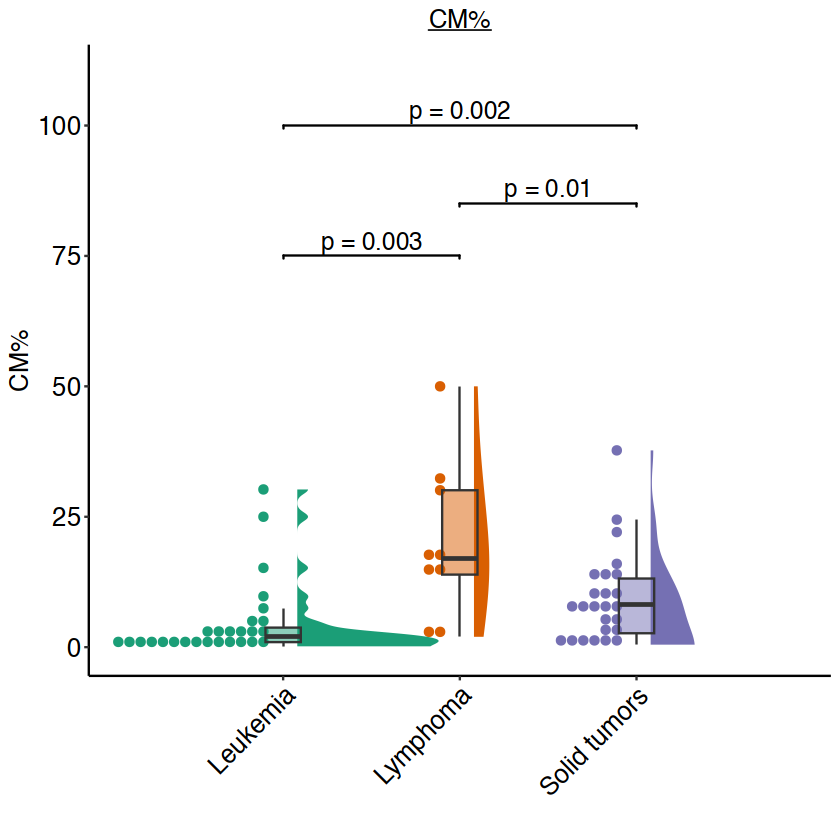

In [40]:
p1_stat

TE

In [41]:
p2 <- baseraincloud_plot.fx(pbmc_01, "`TE%`", "cancergroup", "cancergroup", group_col, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = NA)  

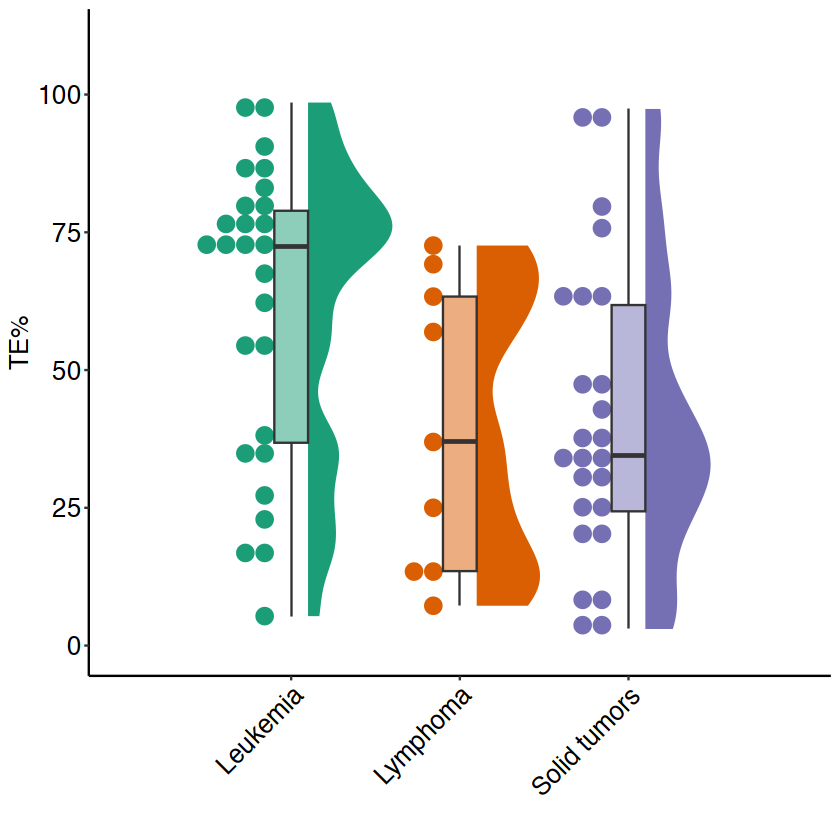

In [42]:
p2

In [43]:
mytest <- "TE%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

[1] 0.009475695

[1] 0.07249461

[1] 0.9620629

In [44]:
mypval3 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [45]:
mypval3 <- round_and_format(mypval3)

In [46]:
tapply(pbmc_01$`TE%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.343  36.803  72.391  61.357  78.908  98.550 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.222  13.511  36.944  39.784  63.333  72.595 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.008  24.360  34.472  41.104  61.797  97.386 


In [47]:
p2_stat <- p2 + geom_signif(
    y_position = 105, xmin = 1, xmax = 3,
    annotation = paste0("p = ",mypval3), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("TE%") ))

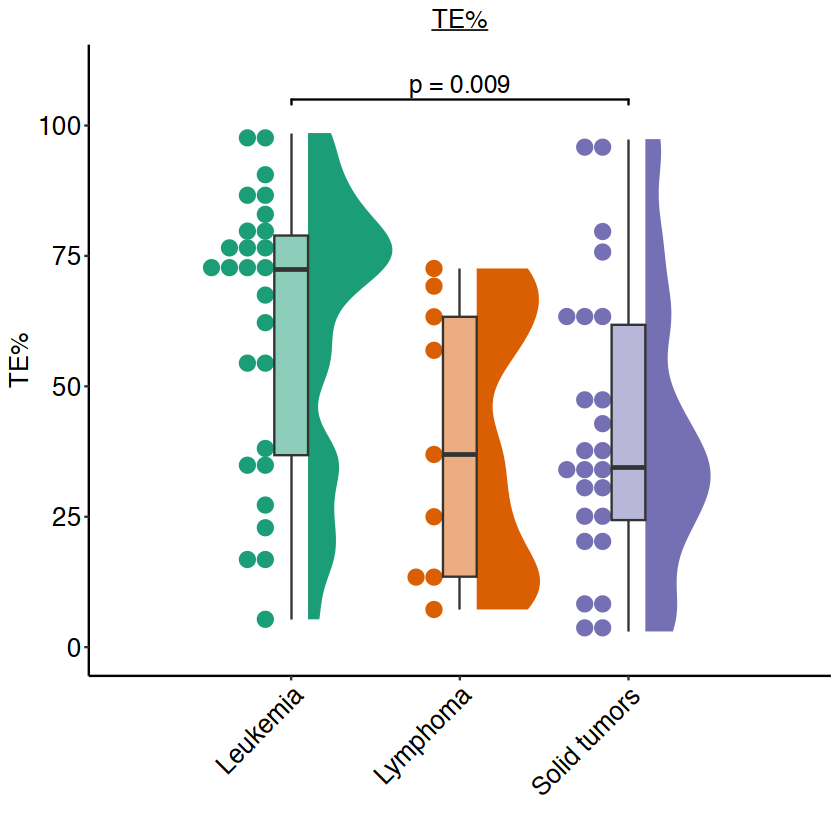

In [48]:
p2_stat

In [49]:
# pdf(paste0(plotpath, "rainclouds_TE_X01.pdf"), width = 4, height = 6)
# p2_stat
# dev.off()

SCM

In [50]:
p_scm <- baseraincloud_plot.fx(pbmc_01, "`SCM%`", "cancergroup", "cancergroup", group_col, 
scaledots = 0.1, justdots= 1.2, scaleslab= 0.1, justslab= -0.2 , adjustslab= 0.5, binwidth. = 3) 

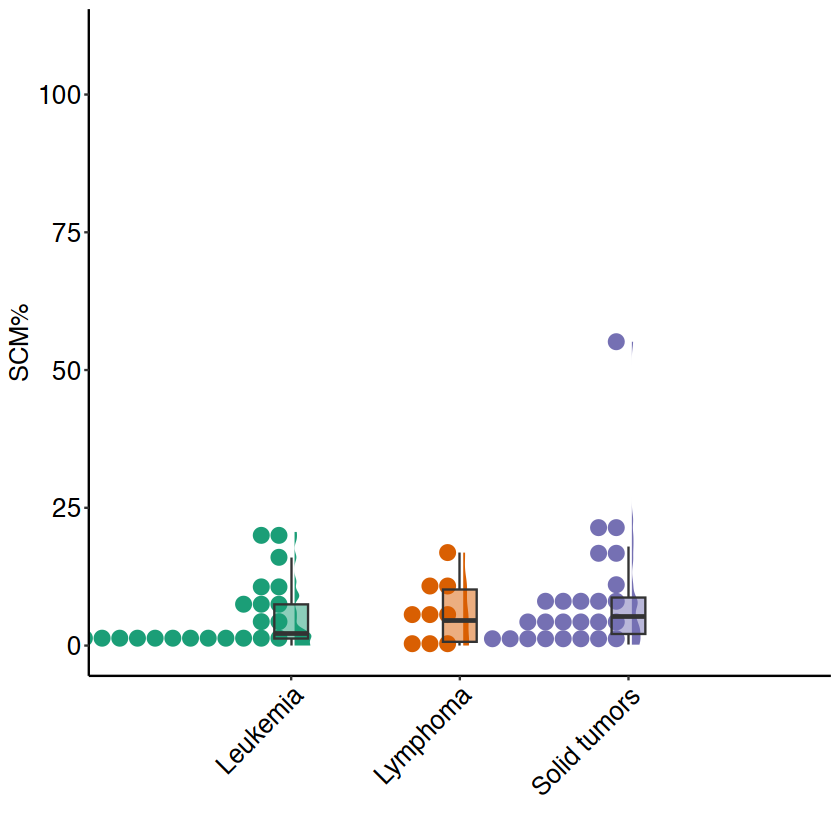

In [51]:
p_scm 

In [52]:
tapply(pbmc_01$`SCM%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.275   2.230   4.862   7.475  20.623 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.676   4.615   6.113  10.173  16.875 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.157   2.103   5.185   8.630   8.711  55.142 


In [53]:
mytest <- "SCM%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.06549631

[1] 0.6816659

[1] 0.4041996

In [54]:
# mypval <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [55]:
# mypval <- round_and_format(mypval)

In [56]:
# mypval

In [57]:
# p0_stat <- p0 + geom_signif(
#     y_position = 100, xmin = 1, xmax = 3,
#     annotation = paste0("p = ",mypval), tip_length = 0.01, textsize = 5
#   ) + ggtitle(expression(underline("Naïve%") ))

In [58]:
# pdf(paste0(plotpath, "rainclouds_SCM_X01.pdf"), width = 4, height = 6)
# p0_stat
# dev.off()

EM

In [59]:
p_em <- baseraincloud_plot.fx(pbmc_01, "`EM%`", "cancergroup", "cancergroup", group_col,
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 1, binwidth. = unit(0.01, "npc") ) 

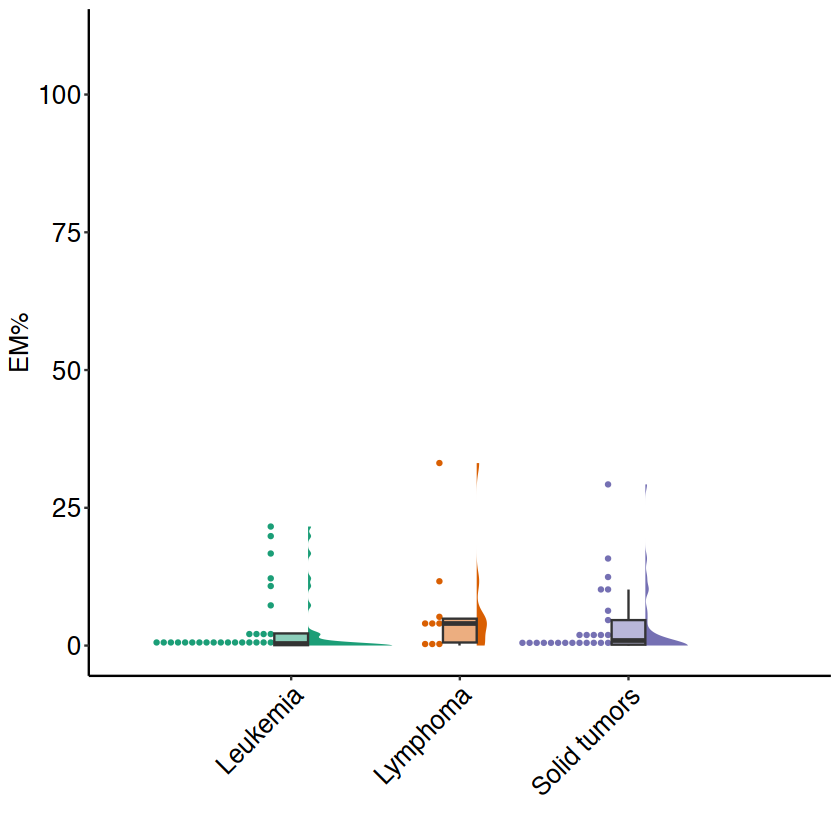

In [60]:
p_em 

In [61]:
table(pbmc_01$cancergroup)


    Leukemia     Lymphoma Solid tumors 
          27            9           25 

In [62]:
tapply(pbmc_01$`EM%`, pbmc_01$cancergroup, summary)

$Leukemia
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00000  0.07014  0.40000  3.73754  2.20086 21.59827 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.5556  4.0570  6.9290  4.8780 33.1230 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1595  0.9848  4.0458  4.6203 29.2449 


In [63]:
mytest <- "EM%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.3524996

[1] 0.2125052

[1] 0.1186999

In [348]:
mypval_em <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [349]:
mypval_em <- round_and_format(mypval_em)

In [350]:
mypval_em

[1] "0.4"

In [351]:
pem_stat <- p_em + geom_signif(
    y_position = 100, xmin = 1, xmax = 3,
    annotation = paste0("p = ", mypval_em), tip_length = 0.01, textsize = 5
) + ggtitle(expression(underline("EM%")))


In [352]:
# pdf(paste0(plotpath, "rainclouds_SCM_X01.pdf"), width = 4, height = 6)
# p0_stat
# dev.off()

PD1

In [353]:
p3 <- baseraincloud_plot.fx(pbmc_01, "`PD1%`", "cancergroup", "cancergroup", group_col,
scaledots = 0.8, justdots= 1.1, scaleslab= 0.8, justslab= -0.1 , adjustslab= 1, binwidth. = 2)  

Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”


Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_dotsinterval()`).”


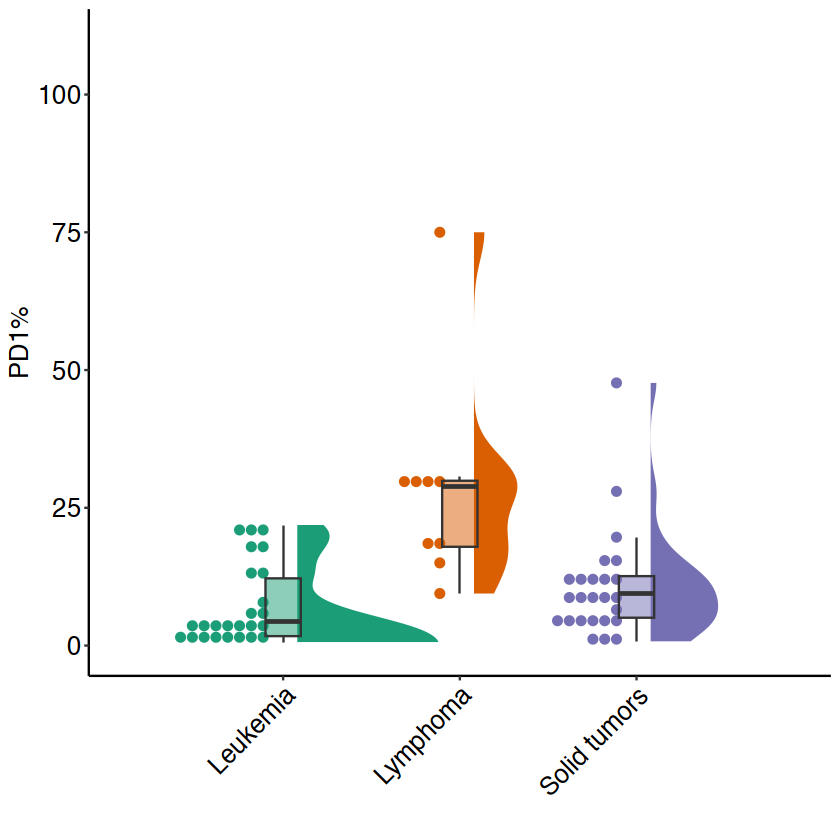

In [354]:
p3

In [355]:
tapply(pbmc_01$`PD1%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.6279  1.7083  4.2779  7.2600 12.1951 21.8750       2 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.444  17.924  28.842  28.321  29.909  75.000 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7637  5.0496  9.3715 10.7284 12.5997 47.6662 


In [356]:
mytest <- "PD1%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.001603698

[1] 0.0008445937

[1] 0.03561137

In [357]:
mytest <- "PD1%"
mypval4 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval5 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval6 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [358]:
mypval4
mypval5
mypval6

[1] 0.001603698

[1] 0.0008445937

[1] 0.03561137

In [359]:
mypval4 <- round_and_format(mypval4)
mypval5 <- round_and_format(mypval5)
mypval6 <- round_and_format(mypval6)

In [360]:
p3_stat <- p3 + geom_signif(
    y_position = c(70, 85, 100), xmin = c(1,2,1), xmax = c(2,3,3),
    annotation = c(paste0("p = ",mypval5), paste0("p = ",mypval4), paste0("p = ",mypval6) ), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("PD1%") ))

Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”


Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_dotsinterval()`).”


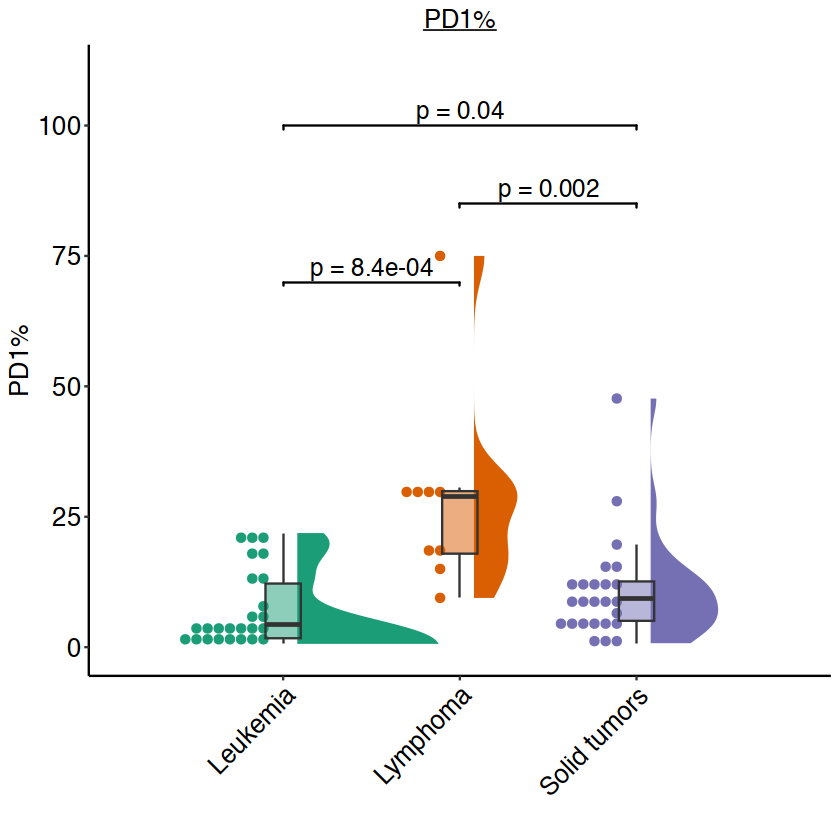

In [361]:
p3_stat

In [362]:
# pdf(paste0(plotpath, "rainclouds_PD1_X01.pdf"), width = 4, height = 6)
# p3_stat
# dev.off()

LAG3

In [363]:
p3_1 <- baseraincloud_plot.fx(pbmc_01, "`LAG3%`", "cancergroup", "cancergroup", group_col, 
scaledots = 0.8, justdots= 1.1, scaleslab= 0.5, justslab= -0.2 , adjustslab= 1, binwidth. = 2)  

Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_dotsinterval()`).”


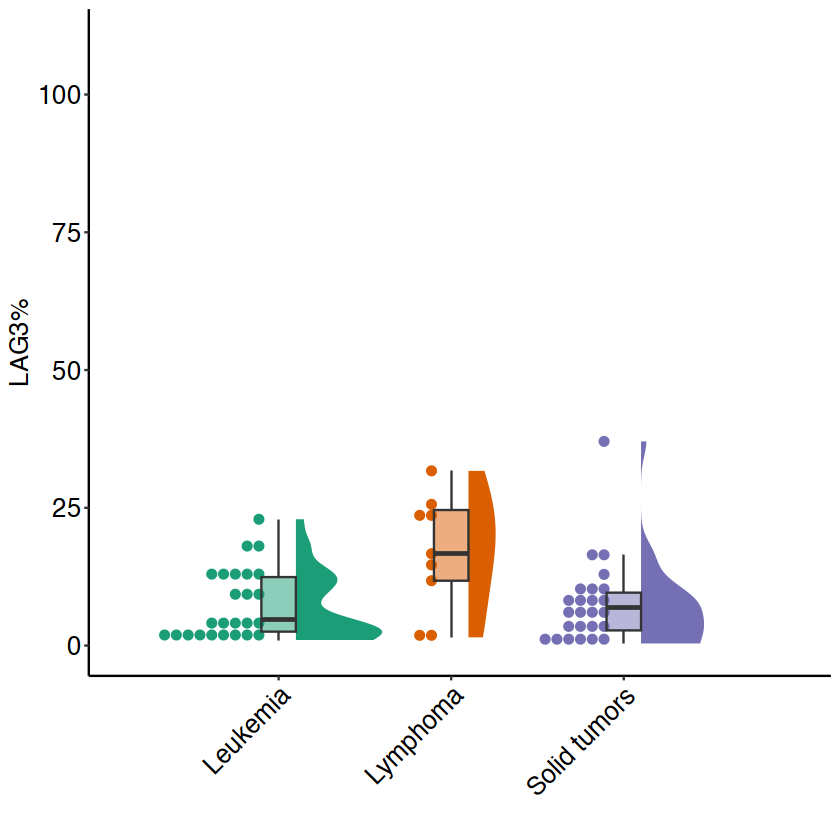

In [364]:
p3_1

In [365]:
mytest <- "LAG3%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.006451857

[1] 0.02263256

[1] 0.7102039

In [366]:
mytest <- "LAG3%"
mypval4_1 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval5_1 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

In [367]:
mypval4_1 <- round_and_format(mypval4_1)
mypval5_1 <- round_and_format(mypval5_1)

In [368]:
p3_stat_1 <- p3_1 + geom_signif(
    y_position = c(85, 100), xmin = c(1,2), xmax = c(2,3),
    annotation = c(paste0("p = ",mypval5_1), paste0("p = ",mypval4_1) ), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("LAG3%") ))

Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_signif()`).”


Warning message:
“Removed 2 rows containing missing values (`geom_dotsinterval()`).”


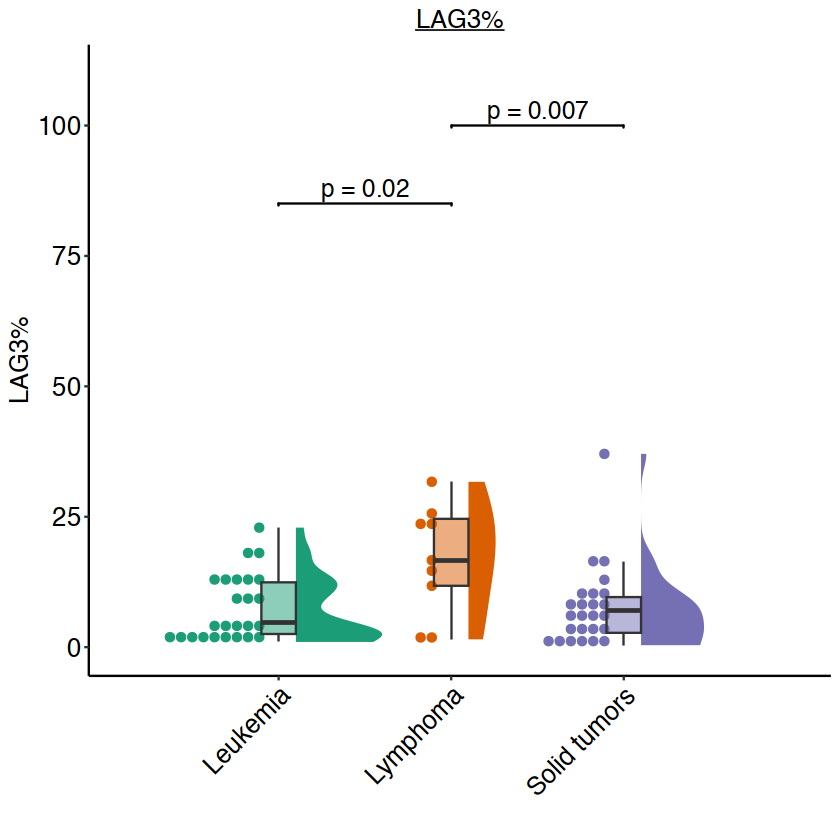

In [369]:
p3_stat_1

In [370]:
# pdf(paste0(plotpath, "rainclouds_LAG3_X01.pdf"), width = 4, height = 6)
# p3_stat_1
# dev.off()

TIM3

In [371]:
p3_2 <- baseraincloud_plot.fx(pbmc_01, "`TIM3%`", "cancergroup", "cancergroup", group_col, 
scaledots = 0.8, justdots= 1.1, scaleslab= 0.8, justslab= -0.1 , adjustslab= 1, binwidth. = NA)  

Warning message:
“Removed 3 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_dotsinterval()`).”


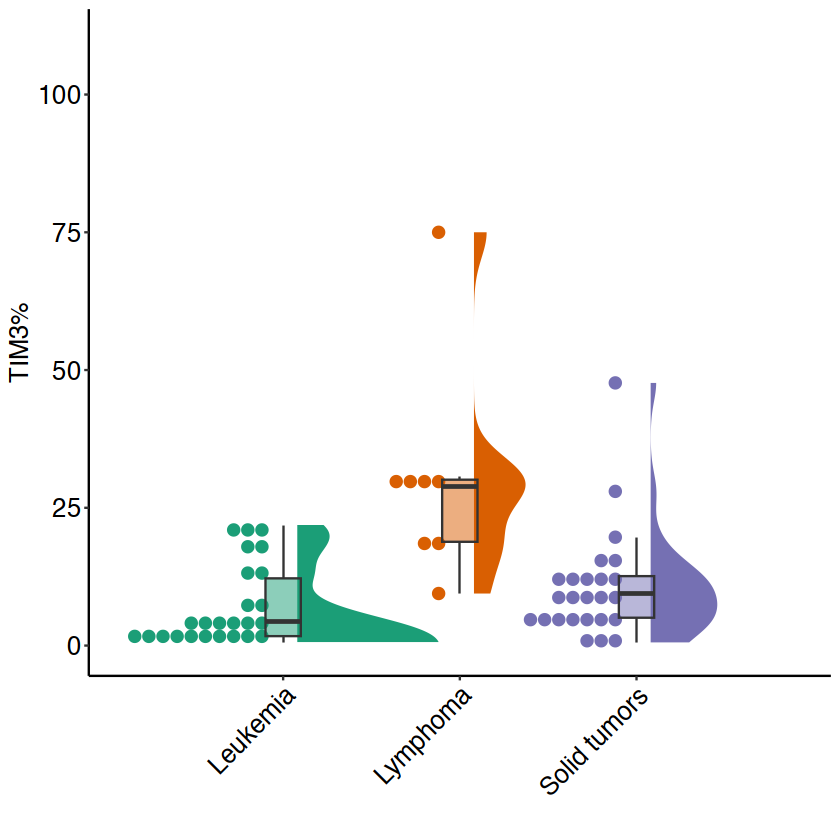

In [372]:
p3_2

In [373]:
mytest <- "TIM3%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.0007610113

[1] 0.001273106

[1] 0.03561137

In [374]:
mytest <- "TIM3%"
mypval4_2 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval5_2 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval6_2 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [375]:
mypval4_2 <- round_and_format(mypval4_2)
mypval5_2 <- round_and_format(mypval5_2)
mypval6_2 <- round_and_format(mypval6_2)

In [376]:
p3_stat_2 <- p3_2 + geom_signif(
    y_position = c(78, 88,105), xmin = c(1,2,1), xmax = c(2,3,3),
    annotation = c(paste0("p = ",mypval5_2), paste0("p = ",mypval4_2), paste0("p = ",mypval6_2) ), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("TIM3%") ))

Warning message:
“Removed 3 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_dotsinterval()`).”


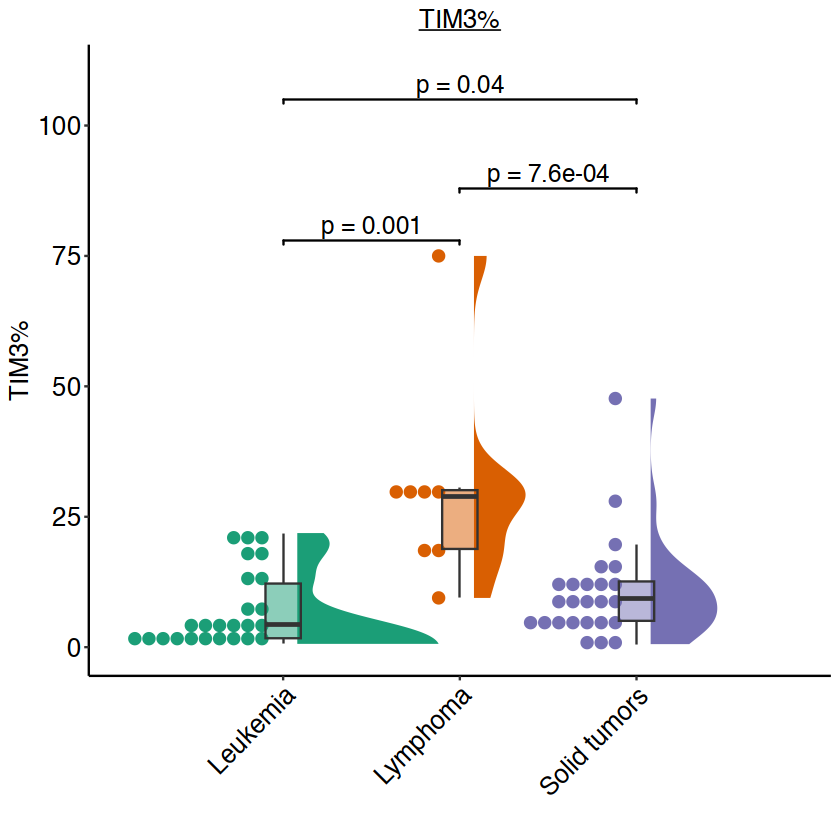

In [377]:
p3_stat_2

In [378]:
# pdf(paste0(plotpath, "rainclouds_TIM3_X01.pdf"), width = 4, height = 6)
# p3_stat_2
# dev.off()

TCR

In [379]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
pbmc_01 <- pbmc[pbmc$cycle == "X01",]
pbmc_01 <- pbmc_01[ !is.na(pbmc_01$TRB),]

In [380]:
p4 <- baseraincloud_plot.fx(pbmc_01, "log10shann", "cancergroup", "cancergroup", group_col, 
scaledots = 0.8, justdots= 1.1, scaleslab= 0.8, justslab= -0.1 , adjustslab= 0.5, binwidth. = 0.1)  

In [381]:
mytest <- "log10shann"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

[1] 0.5187846

[1] 0.8989843

[1] 0.8108015

In [382]:
mybreaks <- c(1, 10, 100, 500, 1000, 1500)
# mybreaks <- c(1, 10, 50, 100)

In [383]:
p4_1 <- p4 + annotation_logticks(sides = "l") +
    scale_y_continuous(breaks = log10(mybreaks), labels = mybreaks) + ggtitle(expression(underline("TCR diversity") )) +
labs(y = "TCR diversity (log10)")

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


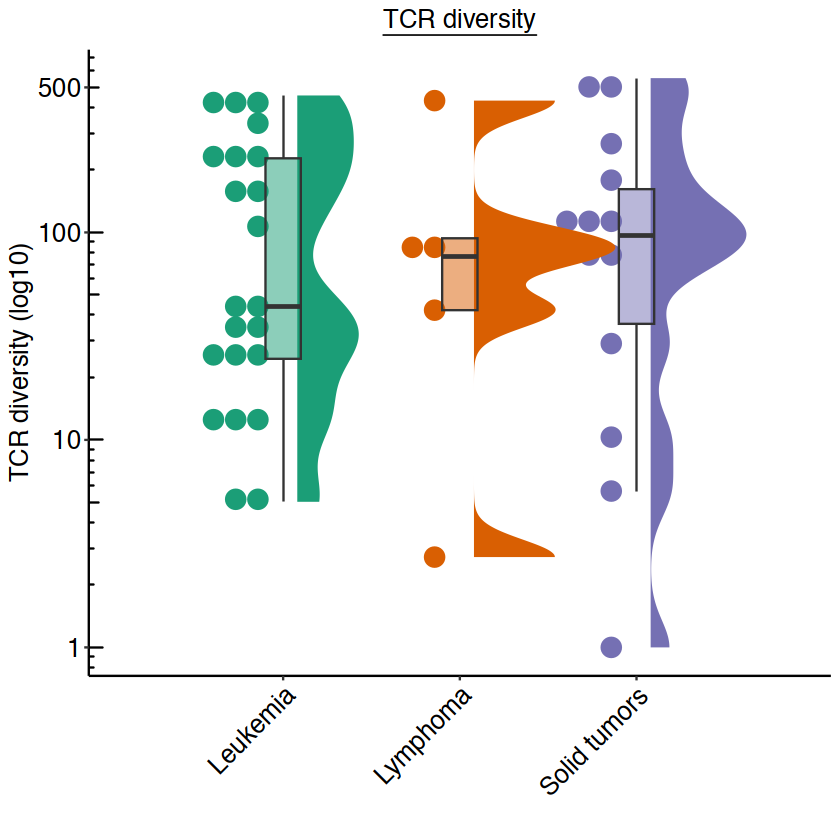

In [384]:
p4_1

In [385]:
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]
cfdna_01 <- cfdna[cfdna$cycle == "X01",]
cfdna_01 <- cfdna_01[ !is.na(cfdna_01$TRB),]

In [391]:
p5 <- baseraincloud_plot.fx(cfdna_01, "log10shann", "cancergroup", "cancergroup", group_col,
scaledots = 0.7, justdots= 1.1, scaleslab= 0.7, justslab= -0.1 , adjustslab= 0.5, binwidth. = 0.04)  

In [387]:
mytest <- "log10shann"
ks.test(cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Solid tumors")], cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Leukemia")])$p.value
ks.test(cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Solid tumors")], cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Lymphoma")])$p.value
ks.test(cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Leukemia")], cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Lymphoma")])$p.value

[1] 0.9422676

[1] 0.1568585

[1] 0.2234618

In [388]:
# mybreaks <- c(1, 10, 100, 500, 1000, 1500)
mybreaks <- c(1, 10, 50, 100)

In [392]:
p5_1 <- p5 + annotation_logticks(sides = "l") +
    scale_y_continuous(breaks = log10(mybreaks), labels = mybreaks) + ggtitle(expression(underline("cfTCR diversity") )) + labs(y = "cfTCR diversity (log10)")

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


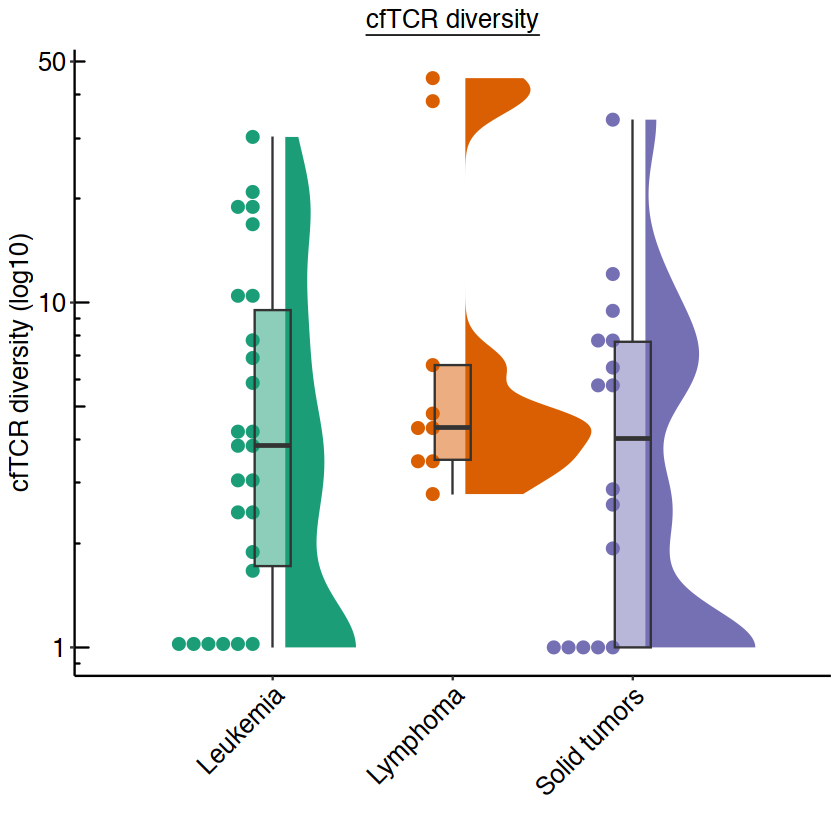

In [393]:
p5_1

In [394]:
pdf(paste0(plotpath, "rainclouds_X01_naive_cm_te_pd1_div.pdf"), width = 12, height = 12)
plot_grid(p3_stat, p3_stat_1, p3_stat_2,
    p0_stat, p1_stat, p2_stat, pem_stat,
p4_1, p5_1, nrow = 3, align = "hv", axis = "lr")
dev.off()

Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_signif()`).”


Warning message:
“Removed 2 rows containing missing values (`geom_dotsinterval()`).”
Warning message:
“Removed 2 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_dotsinterval()`).”
Warning message:
“Removed 3 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_dotsinterval()`).”


pdf 
  2

In [396]:
p4 <- baseraincloud_plot.fx(pbmc_leu, "`LAG3%`", "cycle", "cancergroup", group_col, 0.5, 2)  

ERROR: Error in ggplot(data = mydf, aes(x = eval(parse(text = xvar)), y = eval(parse(text = yvar)), : object 'pbmc_leu' not found


Warning message:
“Removed 169 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 169 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 169 rows containing missing values (`stat_slabinterval()`).”


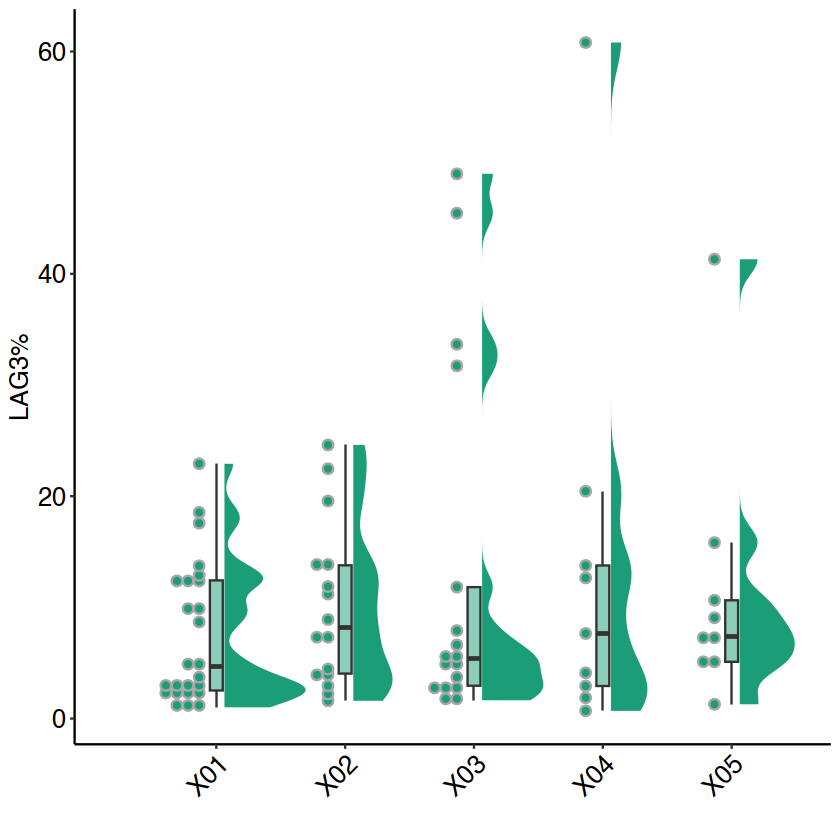

In [ ]:
p4

In [ ]:
mytest <- "LAG3%"
mypval4 <- ks.test(pbmc_leu[[mytest]][ which(pbmc_leu$cycle == "X01")], pbmc_leu[[mytest]][ which(pbmc_leu$cycle == "X05")])$p.value
mypval4 <- formatC(mypval4, format = "e", digits = 2)

In [ ]:
p4_stat <- p4 + geom_signif(
    y_position = 100, xmin = 1, xmax = 4,
    annotation = paste0("p = ",mypval4), tip_length = 0.01, textsize = 5
  ) 

In [ ]:
pdf(paste0(plotpath, "rainclouds_naive_te_pd1_lag3_leukemia.pdf"), width = 4, height = 10)
plot_grid(p1_stat, p2_stat,p3_stat, p4_stat, nrow = 4, align = "v", axis = "lr")
dev.off()

Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”


Warning message:
“Removed 167 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 167 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 167 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 167 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 167 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 170 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 170 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 170 rows containing missing values (`stat_slabinterval()`).”
Warning message:
“Removed 170 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 169 rows containing missing valu

pdf 
  2